In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LatticeData import *

# Explore difference in exceptional configurations between two runs

In [2]:
src_old = "run_2023_10_27_exc_config_test"
dest_old = "/exc_cfg_old/"
print("fetching data from directory "+src_old+" and moving it to "+ dest_old)
data_old = LatticeData(datadir = dest_old)
data_old.copy_data_from_directory(src_old)

# src_new = "run_2023_11_02_test"
# dest_new = "/exc_cfg_new/"
# print("fetching data from directory "+src_new+" and moving it to "+ dest_new)
# data_new = LatticeData(datadir = dest_new)
# data_new.copy_data_from_directory(src_new)

fetching data from directory run_2023_10_27_exc_config_test and moving it to /exc_cfg_old/
run not yet complete
L_160_beta_1.600000_itheta_0.000000_ntherm_0_nMC_20000_freq_10
Status: 1889 lines written
run not yet complete
L_160_beta_1.600000_itheta_1.570796_ntherm_0_nMC_20000_freq_10
Status: 1761 lines written


In [3]:
# print("fetching exceptional configurations from source directories")
# df_old = data_old.get_exceptional_configurations(src_old)
# df_new = data_new.get_exceptional_configurations(src_new)

# print("Old data in df: ")
# print(df_old.head())
# print("New data in df: ")
# print(df_new.head())

# print("Number of exceptional configurations in old data:") #note -- are these triangles or whole configurations?
# print(df_old["num_exc"].unique())
# print("Number of exceptional configurations in new data:")#note -- are these triangles or whole configurations?
# print(df_new["num_exc"].unique())

# print("Grouping old data ")
# old_grouped = df_old.groupby(["length","itheta","beta","nMC","ntherm", "freq"]).sum()
# print(old_grouped)
# print("Grouping new data ")
# new_grouped = df_new.groupby(["length","itheta","beta","nMC","ntherm", "freq"]).sum()
# print(new_grouped)

# Explore attempts to create non-exceptional configurations

In [9]:
run_dirpath = "/data_exc_cfg_test/"
data_dirpath = "/data_test/"
run_params = {"itheta": 1.0, "beta": 1.6,"length": 20,"nMC": 20, "ntherm": 0, "freq": 1}

In [10]:
from TestingSuite import *

In [11]:
test = TestingSuite(datadir = data_dirpath)
test.setup(run_dirpath)

In [12]:
test.test_run_dir

'/Users/cberger/NonlinearSigmaModel/nonlinearsigmaCL/Analysis//data_exc_cfg_test/'

In [13]:
test.catalog_sites(**run_params)
test.site_catalog

,index,step,i,j,line
0,0,0,18,7,481
1,0,0,14,3,484
2,0,0,6,4,487
3,0,0,14,5,490
4,0,0,2,6,493
...,...,...,...,...,...
1737,0,19,0,15,5931
1738,0,19,1,0,5934
1739,0,19,9,0,5937
1740,0,19,0,4,5940


In [14]:
missing = test.check_for_missing_sites()

In [15]:
sites = test.site_catalog

In [16]:
missing = sites[sites["line"].isna()]
len(missing)/(test.nMC*test.L*test.L)

0.847125

In [17]:
missing.head()

,index,step,i,j,line
0,NaN,0,0,0,NaN
0,NaN,0,0,1,NaN
0,NaN,0,0,4,NaN
0,NaN,0,0,5,NaN
0,NaN,0,0,6,NaN


In [18]:
print("Fetching exceptional configurations from run ")
data_exc = LatticeData(datadir = data_dirpath)
exc_cfgs = data_exc.get_exceptional_configurations(run_dirpath)
print(exc_cfgs.head())

Fetching exceptional configurations from run 
run not yet complete
L_40_beta_1.600000_itheta_3.141593_ntherm_0_nMC_100_freq_1
Status: 101 lines written
   freq   nMC  ntherm    itheta  beta  length  config  num_exc  any_exc
0   1.0  20.0     0.0  3.141593   1.6    20.0    11.0      9.0        1
1   1.0  20.0     0.0  3.141593   1.6    20.0     7.0      5.0        1
2   1.0  20.0     0.0  3.141593   1.6    20.0     4.0     12.0        1
3   1.0  20.0     0.0  3.141593   1.6    20.0    10.0     14.0        1
4   1.0  20.0     0.0  3.141593   1.6    20.0     8.0      6.0        1


Graphing exceptional configurations from run:


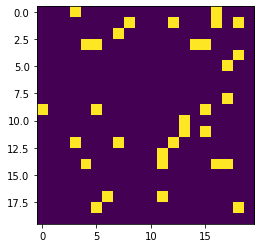

In [28]:
print("Graphing exceptional configurations from run:")
excdf=data_exc.find_exc(run_dirpath,**run_params)\

# With the new format of the function, this is how to look at just one configuration. Change 'config' to look at different configurations
config=0
fig,ax=plt.subplots()
ax.imshow(list(excdf.iloc[config]))
plt.show()

In [46]:
excarray = list(excdf.iloc[config])
i = 0
j = 3
print(excarray[i][j])
test.find_site(i = i,j = j, step = 0)

True


,index,step,i,j,line
160,0.0,0,0,3,977.0
161,0.0,0,0,3,980.0


In [47]:
excarray = list(excdf.iloc[config])
i = 3
j = 4
print(excarray[i][j])
test.find_site(i = i,j = j, step = 0)

True


,index,step,i,j,line
0,NaN,0,3,4,NaN


In [48]:
excarray = list(excdf.iloc[config])
i = 9
j = 0
print(excarray[i][j])
test.find_site(i = i,j = j, step = 0)

True


,index,step,i,j,line
353,0.0,0,9,0,1581.0


In [53]:
excarray = list(excdf.iloc[config])
i = 9
j = 1
print(excarray[i][j])
test.find_site(i = i,j = j, step = 0)

False


,index,step,i,j,line
245,0.0,0,9,1,1242.0


In [52]:
excarray = list(excdf.iloc[config])
i = 9
j = 5
print(excarray[i][j])
test.find_site(i = i,j = j, step = 0)

True


,index,step,i,j,line
0,NaN,0,9,5,NaN


In [51]:
excarray = list(excdf.iloc[config])
i = 9
j = 6
print(excarray[i][j])
test.find_site(i = i,j = j, step = 0)

False


,index,step,i,j,line
24,0.0,0,9,6,555.0
25,0.0,0,9,6,559.0
226,0.0,0,9,6,1184.0
227,0.0,0,9,6,1187.0
228,0.0,0,9,6,1190.0
229,0.0,0,9,6,1193.0


In [ ]:
test.find_site(i = 0,j = 3, step = 0)

In [ ]:
df = test.site_catalog

In [ ]:
step0 = df[df["step"] == 0]

In [ ]:
step0i2 = step0[step0["i"]==2]
step0i2[step0i2["j"]==2]